Osnabrück University - Machine Learning (Summer Term 2019) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 26, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Expectation and Variance) [2 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between sample mean and population mean (expectated value)? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula? What is biased and unbiased sample variance?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

Yes I can.

In [2]:
D1 = np.array([9, 10, 11, 7, 13])
D1.mean()

D3 = np.array([[1, 10, 9], [1, 10, 10], [10, 10, 11]])
D3.mean(axis=0)

NameError: name 'np' is not defined

## Assignment 1: The Perceptron [3 Points]

### a) The Logic Perceptron

For the following two logical functions sketch a perceptron's weights after it was trained. To do so, figure out when the perceptron should fire. Then come up with ideas of how you can achieve this. Remember that $w_0$, the bias, is used as a threshold and that there is a constant $x_0 = 1$. Provide the values for $w_0,w_1,w_2$ as well as some explanation.

#### 1) $(A \wedge B) \vee (\neg A \wedge B)$

0 ,1, 0

#### 2) $(A \wedge B) \vee (\neg A \wedge B) \vee (A \wedge \neg B)$

0,1,1

## Assignment 2: Perceptron [7 Points]

In this exercise you will implement a simple perceptron as described in the lecture [ML-07 Slide 31]. As with  previous exercises it is possible to not use our premade code blocks but write the single Perceptron completely from scratch (an empty cell to do so can be found [below](#Own-Implementation)). 

Use the following output function:
$$y = \begin{cases}1 \quad \text{if} \ s > 0\\0 \quad \text{else}\end{cases}$$

The `TODO`'s in the following code segments guide you through what has to be done.

*Hint*: If you have problems with `np.arrays` (which usually have shapes like `(13,)`, thus with one degenerate dimension, either set the shapes manually (`my_np_array.shape = (13, 1)`). Other useful functions might be `np.append` or `np.hstack`.

In [6]:
import numpy as np
import numpy.random as rnd

# TODO: Write the input activation (called net_input) and the output function (called out_fun).
def net_input(D, W):
    return np.dot(D, W)

def out_fun(val):
    return np.heaviside(val,0)

# TODO: Write a function generate_weights that generates N (= number of dimensions) + 1 (w_0) random weights.
def generate_weights(N):
    return np.hstack((1, rnd.rand(N)))

In [7]:
####################################################
## Testing the perceptron with a concrete example ##
####################################################

# Dimensions for our test.
dims = 12

# Input is a row vector. (Shape is (1, 13).)
D = np.hstack((1, rnd.rand(dims) - 0.5))

# Weights are stored in a vector.
W = generate_weights(dims)

out = out_fun(net_input(D, W))

assert out == 1 or out == 0, "The output has to be either 1 or 0, but was {}".format(out)

The following `eval_network(t, D, W)` function is used to measure the performance of your perceptron for the upcoming task.

In [8]:
def eval_network(t, D, W):
    """
    This function takes the trained weights of a perceptron
    and the input data (D) as well as the correct target values (t)
    and computes the overall error rate of the perceptron.
    """
    error = 0.0
    size = max(D.shape)
    for i in range(size):
        out = out_fun(net_input(D[i], W))
        error = error + abs(t[i] - out)
    # Normalize the error.
    try:
        return error.item(0) / size
    except AttributeError:
        return error / size

Now we will use the above defined functions to train the perceptron to one of the following logical functions: OR, NAND or NOR. 

In [9]:
# Plotting functions
import matplotlib.pyplot as plt

def functions_to_learn(selector):
        """
        Functional definitions for the perceptron to learn
        Instantiates plots for visualization of the decision boundary
        :param selector: selects which function to activate
        :return function:
        """
        plot_points = [[0,0],[0,1],[1,0],[1,1]]
        plot_colors = []
        if selector == 'and':
            function = lambda x1, x2: x1 and x2
            for point in plot_points:
                plot_colors.append(function(point[0], point[1]))
            for color, point in enumerate(plot_points):
                plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
            print("Perceptron will now learn '{}'...\n\n".format(selector))
            return function
        elif selector == 'or':
            function = lambda x1, x2: x1 or x2
            for point in plot_points:
                plot_colors.append(function(point[0], point[1]))
            for color, point in enumerate(plot_points):
                plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
            print("Perceptron will now learn '{}'...\n\n".format(selector))
            return function
        elif selector == 'nand':
            function = lambda x1, x2: not (x1 and x2)
            for point in plot_points:
                plot_colors.append(function(point[0], point[1]))
            for color, point in enumerate(plot_points):
                plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
            print("Perceptron will now learn '{}'...\n\n".format(selector))
            return function
        elif selector == 'nor':
            function = lambda x1, x2: not (x1 or x2)
            for point in plot_points:
                plot_colors.append(function(point[0], point[1]))
            for color, point in enumerate(plot_points):
                plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
            print("Perceptron will now learn '{}'...\n\n".format(selector))
            return function
        elif selector == "xor":
            function = lambda x1, x2: (x1 and not x2) or (not x1 and x2)
            for point in plot_points:
                plot_colors.append(function(point[0], point[1]))
            for color, point in enumerate(plot_points):
                plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
            print("Perceptron will now learn '{}'...\n\n".format(selector))
            return function
        else:
            raise ValueError("Incorrect function to learn.  Pick and/or/nand/nor.  Input was:", selector)

Perceptron will now learn 'nand'...




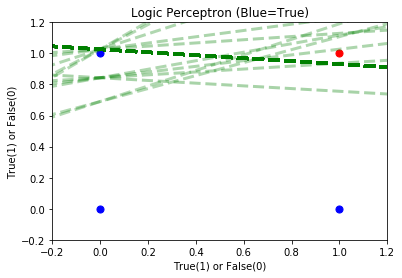

Overall error of the Perceptron: 0.00%


array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [10]:
import matplotlib.pyplot as plt

###################################################
## Now we train our perceptron! [ML-07 Slide 33] ##
###################################################

# TODO: Write the update function (name it 'delta_fun')
#       for the weights dependent on epsilon, the target,
#       the output and the input vector.
def delta_fun(eps, t, y, i):
    su = (t-y)*i
    return eps*su
    

# TODO: Define suitable parameters for your problem.
# Use the following names:
#   ϵ: learning rate
#   dims: dimensions
#   training_size: the number of training samples
ε = 0.03
dims = 2
training_size = 100


# TODO: Generate the weights (in a variable called W).
W = generate_weights(dims)

# TODO: Generate a matrix D of truthvalue pairs.
# The shape should be (training_size, dims).
D = np.random.randint(0, 2, (training_size, dims))

# TODO: Pad the input D with ones for the bias. The bias should always be
# w_0, i. e. the first column of the data should be ones.
bias = np.ones((training_size,1))
#print(bias)
D = np.append(bias,D, axis=1)
# Learn one of the logical functions OR, NAND, NOR
# (the lambda keyword is just a short way to define functions. It is equivalent to
#   def log_operator_and(x1, x2):
#       return x1 and x2
log_operator_and  = lambda x1, x2: x1 and x2
log_operator_or   = lambda x1, x2: x1 or x2
log_operator_nand = lambda x1, x2: not (x1 and x2)
log_operator_nor  = lambda x1, x2: not (x1 or x2)
log_operator_xor  = lambda x1, x2: (x1 and not x2) or (not x1 and x2)

# Change these two lines to choose the other operators:
log_operator = log_operator_nand
functions_to_learn("nand")

row_operator = lambda row: log_operator(row[0], row[1])
labels = np.apply_along_axis(row_operator, 1, D[:, 1:])

epochs = 200    # Extra question: What effects do changes in the epochs 
samp_size = 5  #                 and sample sizes have on our training?

for i in range(epochs):
    # Sample random from the training data.
    for idx in rnd.choice(range(training_size), samp_size, replace=False):
        y = out_fun(net_input(D[idx], W))
        W += delta_fun(ϵ, labels[idx], y, D[idx])
    # Plotting code
    y_point = (0, (-W[0] / W[2]))
    x_point = ((-W[0] / W[1]), 0)
    try:
        slope = (y_point[1] - x_point[1]) / (y_point[0] - x_point[0]) # will not work if x and y intercepts are 0
    except ZeroDivisionError:
        print("X and Y intercepts are both zero.  Due to the way slope is calculated, this causes a division by zero.  Sorry.")
    y_out = lambda points: slope * points
    x = np.linspace(-10, 10, 100)
    plt.plot(x, y_out(x) + y_point[1], 'g--', linewidth=3, alpha=i/epochs +.2 if i/epochs +.2 < 1 else 1)
    
plt.ylim([-.2, 1.2])
plt.xlim([-.2, 1.2])
plt.title("Logic Perceptron (Blue=True)")
plt.xlabel("True(1) or False(0)")
plt.ylabel("True(1) or False(0)")
plt.show()

# Print the overall performance of the Perceptron.
print("Overall error of the Perceptron: {:.2%}".format(eval_network(labels, D, W)))
D

### Own Implementation

Skip this if you already implemented the perceptron above.

In [ ]:
# Space for complete own implementation

# YOUR CODE HERE

## Assignment 3: Sigmoid Activation & Backpropagation Delta Functions [6 Points]

In this exercise we are first going to take the derivative of a famous activation function - the sigmoid function:

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

This function is commonly used because of its nice analytical properties: Its domain is $\in[0,1]$, it is non-linear, strictly monotonous, continuous, differentiable and the derivative can be expressed in terms of the original function at the given point. This allows us to avoid redundant calculations. The sigmoid function is a special case of the more general *Logistic function* which can be found in many different fields: Biology, chemistry, economics, demography and recently most prominently: artificial neural networks.

Take the derivative $\frac{\partial \sigma}{\partial t}$ and (if possible) write the resulting expression in terms of $\sigma(t)$:

$$\sigma(t)' = e^{-t}*\sigma(t)^2* \frac{\partial t}{\partial t}$$

Multilayer perceptrons (MLPs) can be regarded as a simple concatenation (and parallelization) of several perceptrons, each having a specified activation function $\sigma$ and a set of weights $\mathbf{w}_{ij}$. The idea that this can be done was discovered early after the invention of the perceptron, but people didn't really use it in practice because nobody really knew how to figure out the appropriate $\mathbf{w}_{ij}$. The solution to this problem was the discovery of the backpropagation algorithm which consists of two steps: first propagating the input forward through the layers of the MLP and storing the intermediate results and then propagating the error backwards and adjusting the weights of the units accordingly.

An updating rule for the output layer can be derived straightforward. The rules for the intermediate layers can be derived very similarly and only require a slight shift in perspective - the mathematics for that are however not in the standard toolkit so we are going to omit the calculations and refer you to the lecture slides.

We take the least-squares approach to derive the updating rule, i.e. we want to minimize the Loss function
$$L = \frac{1}{2}(y-t)^2$$
where t is the given (true) label from the dataset and y is the (single) output produced by the MLP. To find the weights that minimize this expression we want to take the derivative of $L$ w.r.t. $\mathbf{w}_{i}$ where we are now going to assume that the $\mathbf{w}_{i}$ are the ones directly before the output layer:
$$y = \sigma\left(\sum_{k=1}^n \mathbf{w}_{k}o_k\right)$$
Calculate $\frac{\partial L}{\partial \mathbf{w}_{i}}$.

*Hint*: Start here if you don't know what to do: $\frac{\partial L}{\partial \mathbf{w}_{i}} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial \mathbf{w}_{i}}$

$n = \sum_{k=1}^n \mathbf{w}_{k}o_k$

$\frac{\partial L}{\partial \mathbf{w}_{i}} = (\sigma(n)-t)e^{-n}\sigma(n)^2o_i$

## Assignment 4: The Tensorflow Playground [2 Points]


With the online tool [TensorFlow playground](http://playground.tensorflow.org/) it is possible to interactively play with feed forward neural networks, compellingly visualize their behavior and share specific configurations. 

Follow [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true) to the TensorFlow playground. If you click it, many features are disabled and set to useful defaults, since they were either not discussed yet in the lecture or are not important for this exercise.

You will see a simple configuration: Two activated inputs ($x_1$ and $x_2$), one hidden layer with one neuron (which can be understood as a simple perceptron) and the output shown as a nice picture. It initially shows a training loss of 0.527. Try and run it to see how the perceptron can learn to separate the two clusters. Note that for the rest of the exercise we assume at most about 1000 learning steps (usually many fewer will do it), so don't wait too long in front of your browser.

The dataset gets fully classified after very few iterations. Next try the XOR dataset, either by clicking on it on the left (the top right data pattern) or by following [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true). You will notice that you won't achieve much better results than a loss of 0.4, which is just above chance. Try to improve the result by adding neurons and or layers (but don't change the inputs!) until you get a classification with a loss smaller than 0.01. You may also change the learning rate. Then copy the link from your browser address bar and paste it below:

http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=2,2&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true

How many neurons in hidden layers are already sufficient to get at least 99% classification (i.e. loss < 0.01) if they are a) in one hidden layer or b) in two hidden layers? You may consider configurations which just need above 1000 iterations to get there as well, but we don't expect you to run any configuration longer than 1000 iterations.

a) you need at least 4 with learning rate decay and luck
b) you need 2 per layer